# FD calculation of radioactive decay
We will solve for radioactive using explicit and implicit FD schemes.

Load libraries and set resolution of output figures

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi']= 300

Define physics constants, here we use arbitrary values without any physical meaning

In [2]:
c0      = 1      # initial concentration
k       = 0.1    # decay constant

Setup numerics

In [69]:
dt      = 50                            # time step
steps   = 11                            # number of time steps
Cana    = np.zeros(steps)               # analytical solution
Cana[0] = c0                            # initial condition

Cexp    = Cana.copy()                   # make a copy
Cimp    = Cana.copy()
Ccen    = Cana.copy()

Time    = np.linspace(0, (steps-1)*dt, steps)  # time stepping, and Time vector

Perform calculation

In [70]:
# hide
for n in range(0,len(Cana)-1): 
    
    Cana[n+1] = np.exp(-k*Time[n+1])            #analytical
    Cexp[n+1] = Cexp[n]*(1-k*dt)                #explicit
    Cimp[n+1] = Cimp[n]/(1+k*dt)                #implicit
    Ccen[n+1] = Ccen[n]*(1-k*dt*0.5)/(1+k*dt*0.5) #centered

In [71]:
# write update rules for the explicit and implicit cases!
# Bonus: write an update rule that uses the concentration at the middle of the time step
#for n in range(0,len(Cana)-1): 
    
    # Cana[n+1] = np.exp(-k*Time[n+1])            #analytical
    # Cexp[n+1] = ???
    # Cimp[n+1] = ???

Plot different solutions

<function matplotlib.pyplot.show(close=None, block=None)>

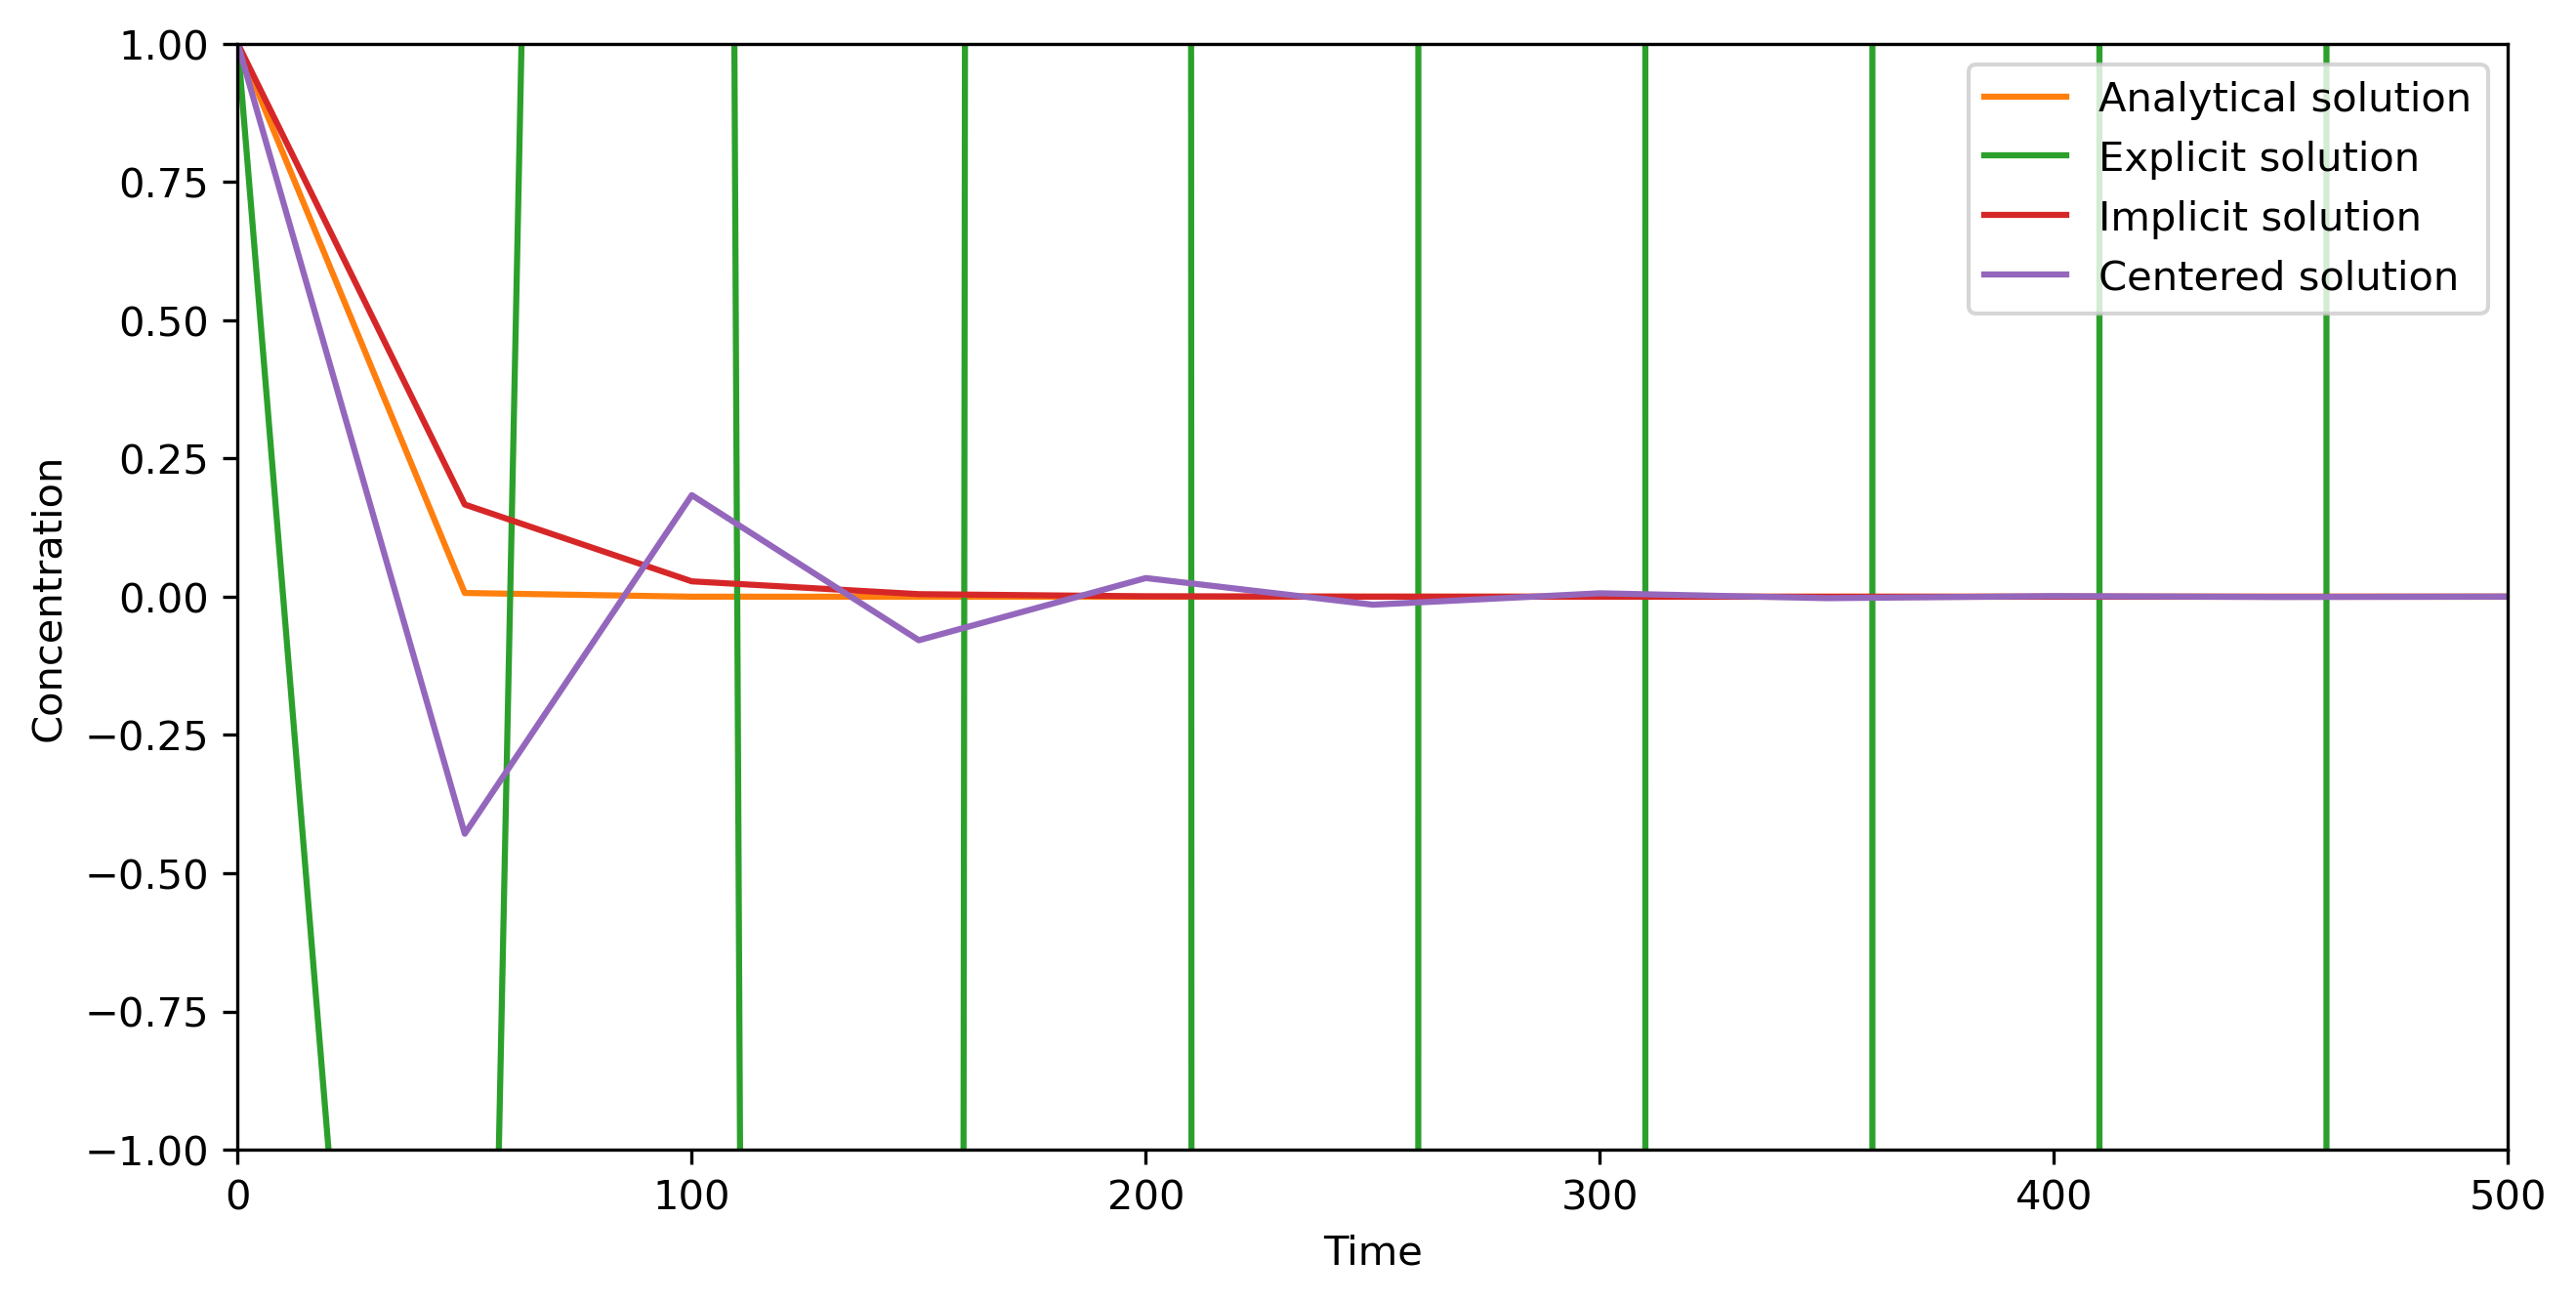

In [72]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(10,5))
fig.clf()
ax  = plt.axes(xlim=(0, dt*(steps-1)), ylim=(-c0, c0))
line, = ax.plot([], [], lw=1)
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')
plt.plot(Time, Cana, label='Analytical solution')
plt.plot(Time, Cexp, label='Explicit solution')
plt.plot(Time, Cimp, label='Implicit solution')
plt.plot(Time, Ccen, label='Centered solution')

plt.legend()

plt.show